In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000707179"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000707179
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,OLD NATIONAL BANCORP /IN/
Ticker,ONB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,1.146667e+01,1.816099e+00,9.24,9.8,11.1,1.289000e+01,1.582000e+01
interest income,14.0,1.320281e+08,2.665271e+07,94960000.00,118273750.0,122687000.0,1.522285e+08,1.789180e+08
net income,58.0,2.830557e+07,2.074122e+07,-18493000.00,17741250.0,22719500.0,3.855775e+07,1.009200e+08
net interest income,37.0,1.203337e+08,6.052302e+07,53608000.00,84482000.0,105801000.0,1.319630e+08,3.174240e+08
provision for loan losses,58.0,3.830414e+06,5.500814e+06,-4572000.00,320000.0,2226000.0,6.000000e+06,2.190500e+07
total revenue,50.0,1.591793e+08,9.833880e+07,89554000.00,101649000.0,111500500.0,1.707282e+08,5.190580e+08


# Plots

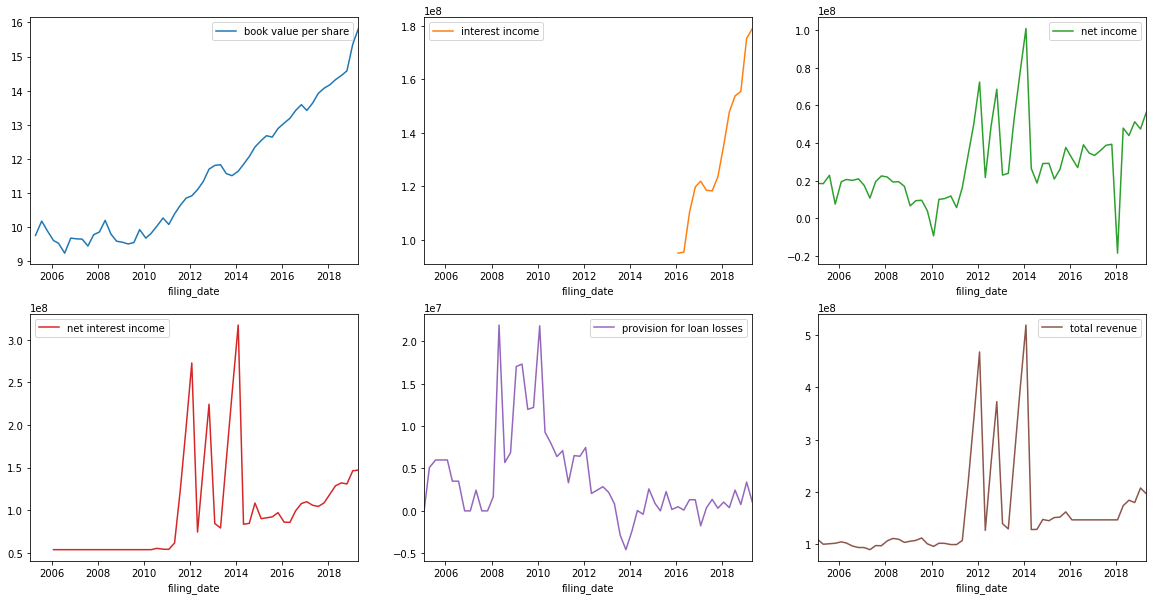

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                          
0000707179 book value per share                        2004Q4  missing   
           interest income       2004Q4 to 2015Q3: 44 periods  missing   
           net interest income    2004Q4 to 2005Q3: 4 periods  missing   
           net interest income   2006Q1 to 2010Q1: 17 periods  missing   
           total revenue          2016Q1 to 2017Q4: 8 periods  missing   

                                        message  
cik        item                                  
0000707179 book value per share  Missing period  
           interest income       Missing period  
           net interest income   Missing period  
           net interest income   Missing period  
           total revenue         Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()